In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
import mpl_toolkits.axisartist as axisartist

In [2]:
plt.rcParams['savefig.dpi'] = 1000 #图片像素 
plt.rcParams['figure.dpi'] = 1000 #分辨率

In [3]:
results = np.load('./fig4/results.npy', allow_pickle=True)
# print(results)
results = results.ravel()[0]
spk = results['spk']
groups = results["groups"]
selected = results["selected"]
fmri = results["fmri"]
pred = results["pred"]
corr = results["corr"]
ami = results["ami"]
sil_tao = results["sil_tao"]
syn_score = results["syn_score"]
rate_score = results["rate_score"]
label = results["label"]
img = results["img"]
# color = results["color"]

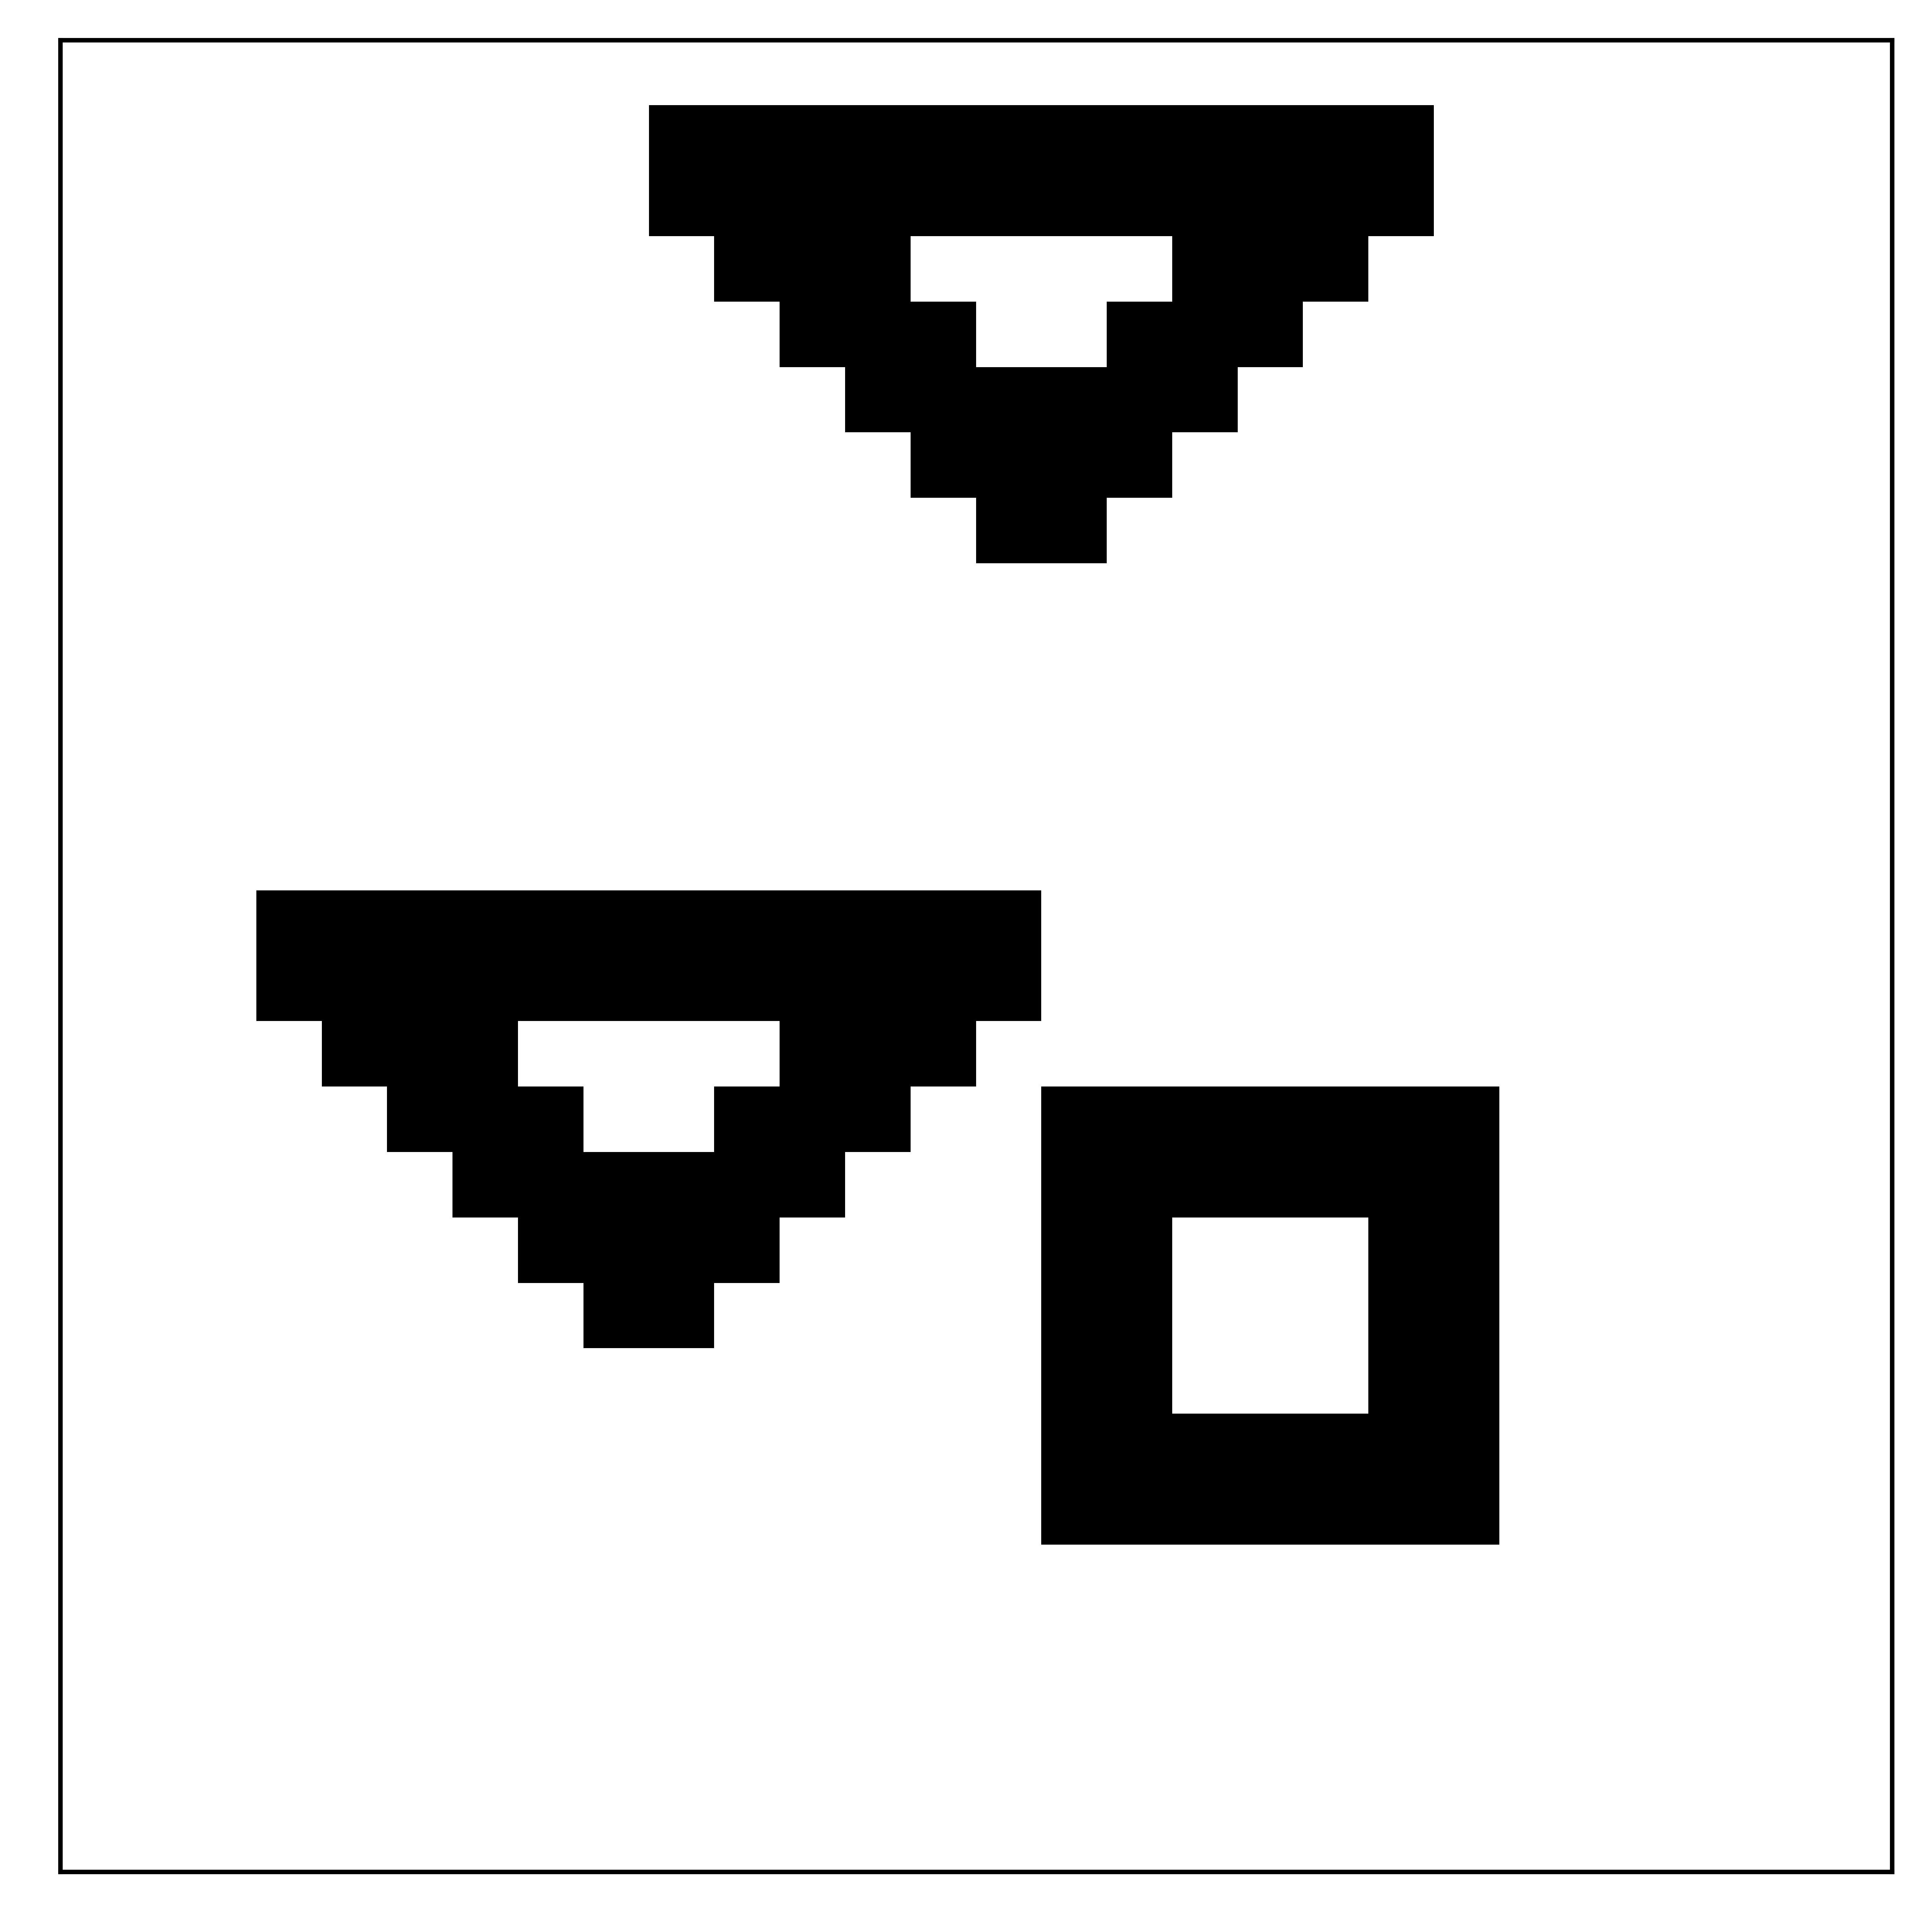

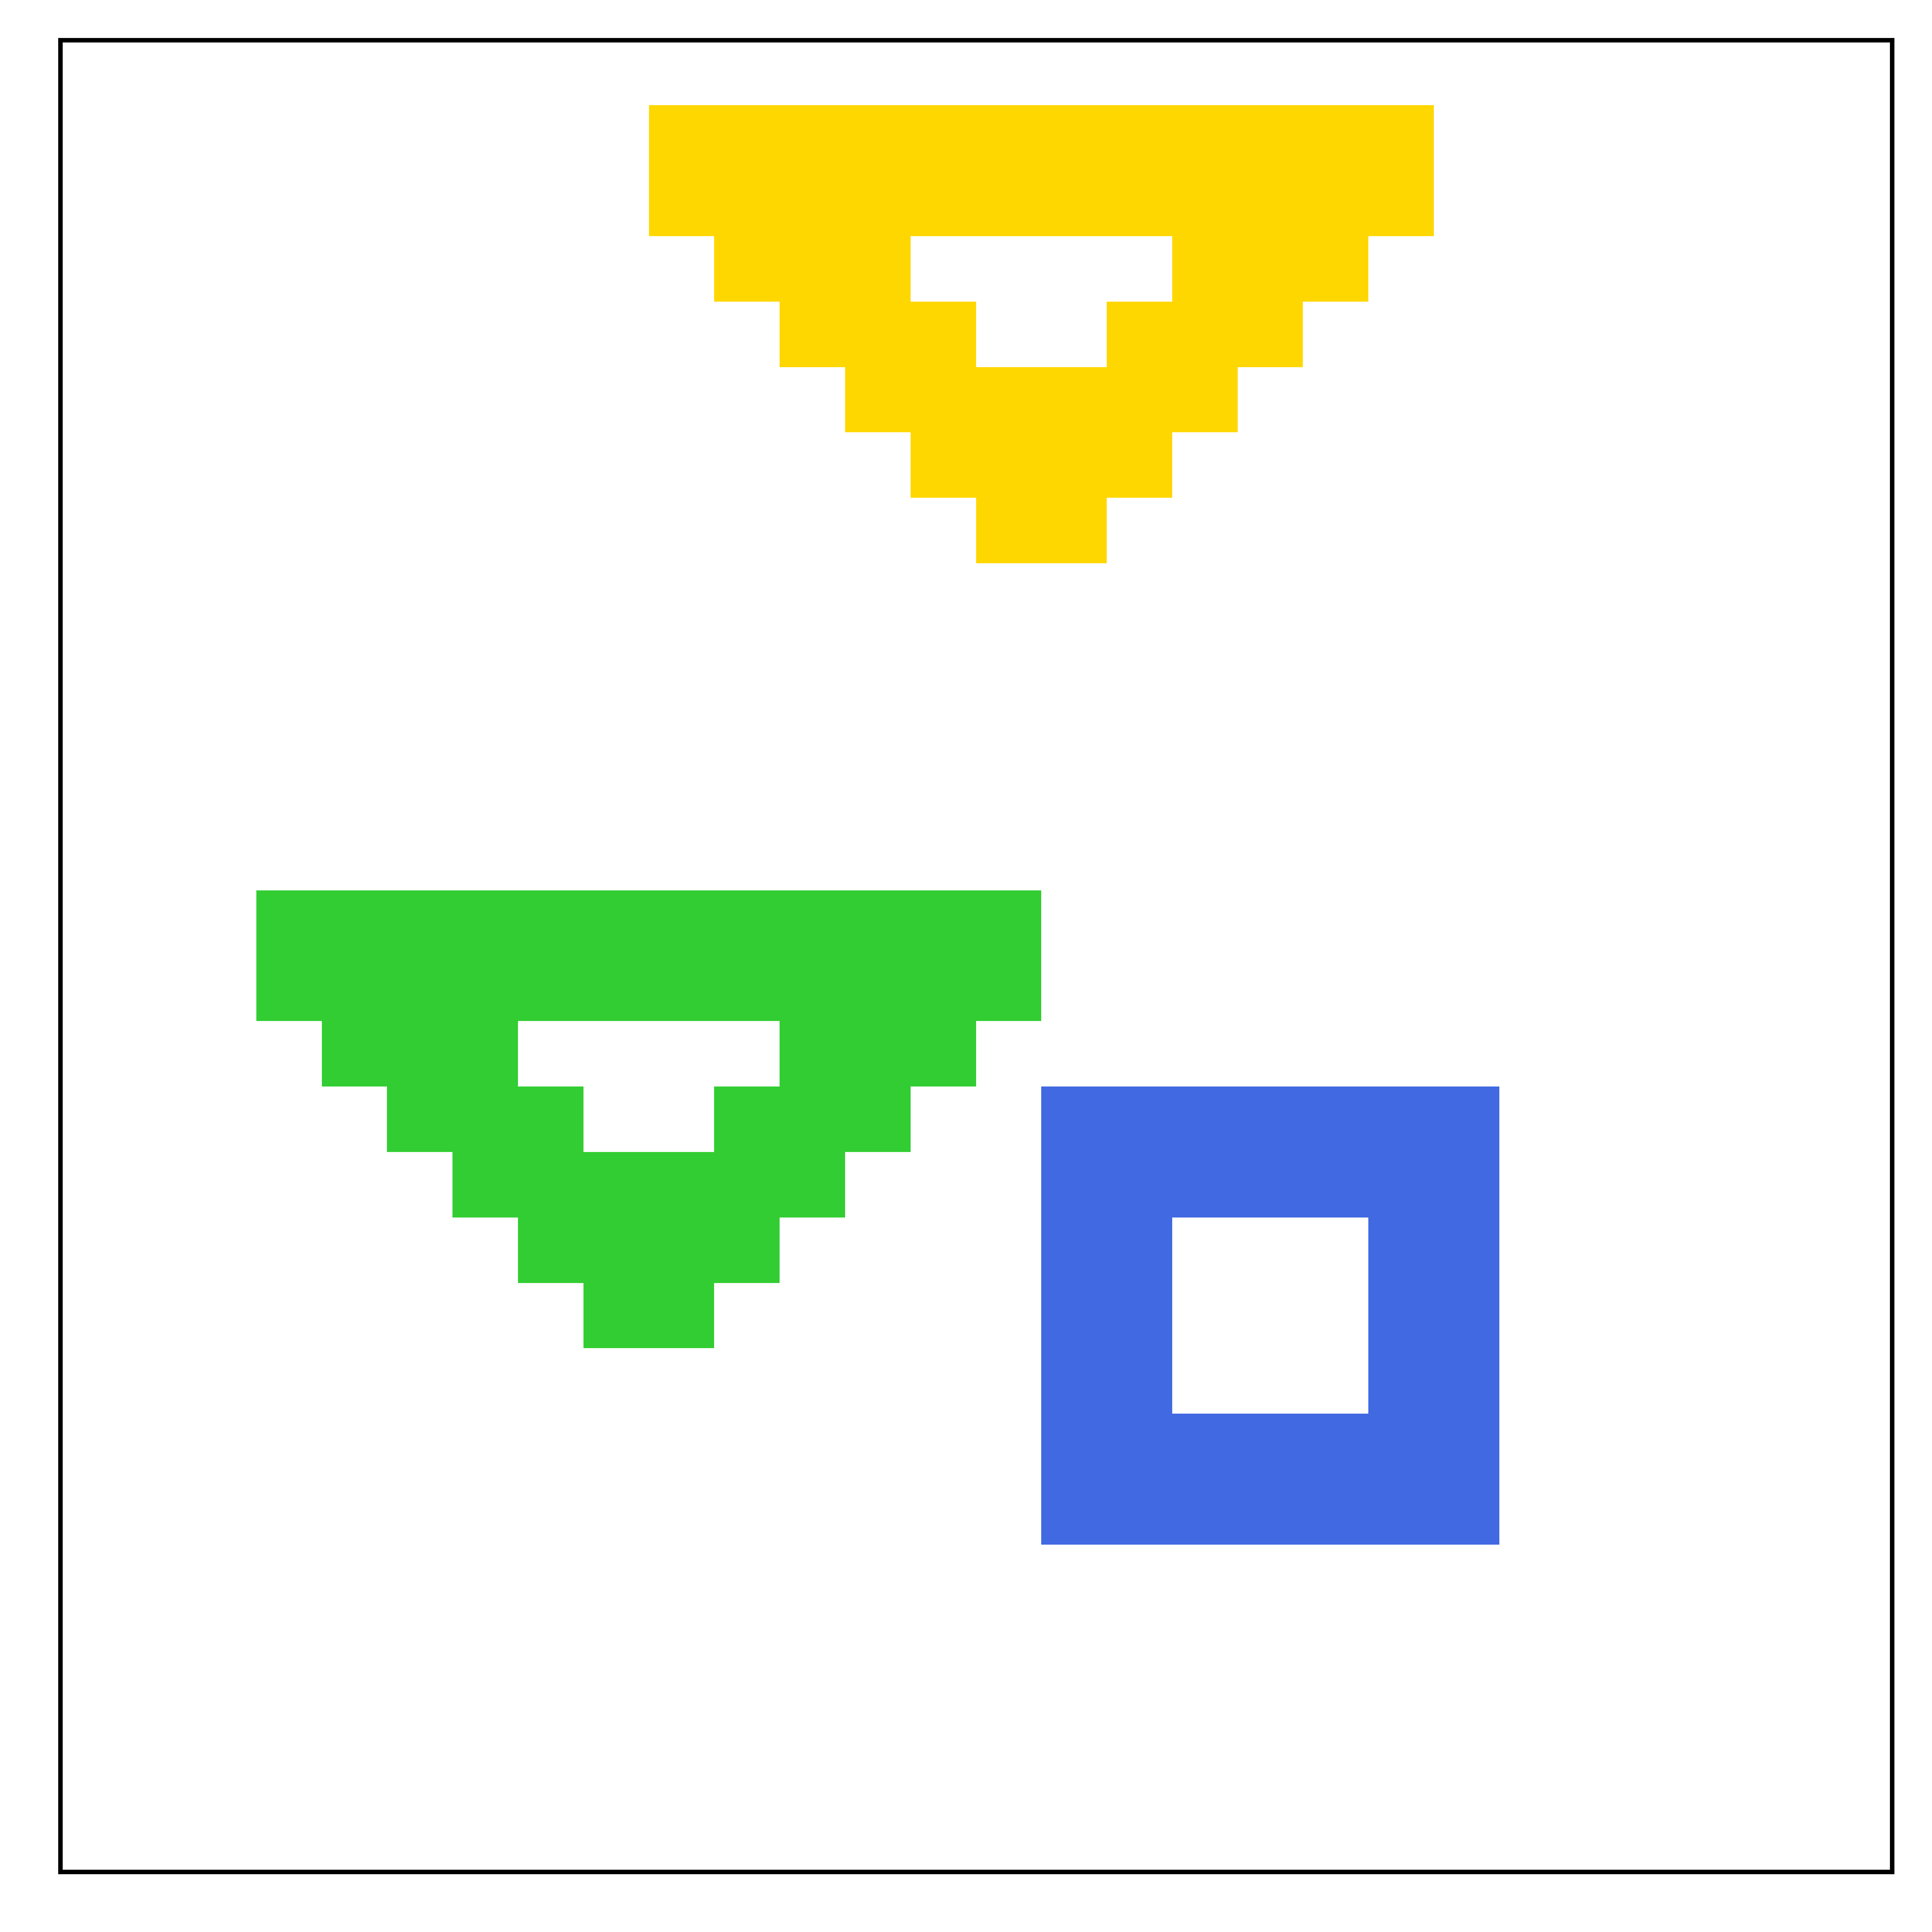

In [4]:
plt.rcParams['figure.figsize'] = (6.0, 6.0) # 单位是inches

plt.figure()
colors = ['white', 'black'] 
cmap = mpl.colors.ListedColormap(colors)
plt.imshow(img, cmap=cmap)
fig = plt.gca()
fig.axes.get_yaxis().set_visible(False)
fig.axes.get_xaxis().set_visible(False)
plt.show()

plt.figure()
colors = ['white', 'gold', 'royalblue', 'limegreen'] 
# colors = ['white', 'coral', 'forestgreen', 'powderblue']
cmap_obj = mpl.colors.ListedColormap(colors)
plt.imshow(label, cmap=cmap_obj)
# plt.imshow(label)
fig = plt.gca()
fig.axes.get_yaxis().set_visible(False)
fig.axes.get_xaxis().set_visible(False)
plt.show()

## pattern可视化

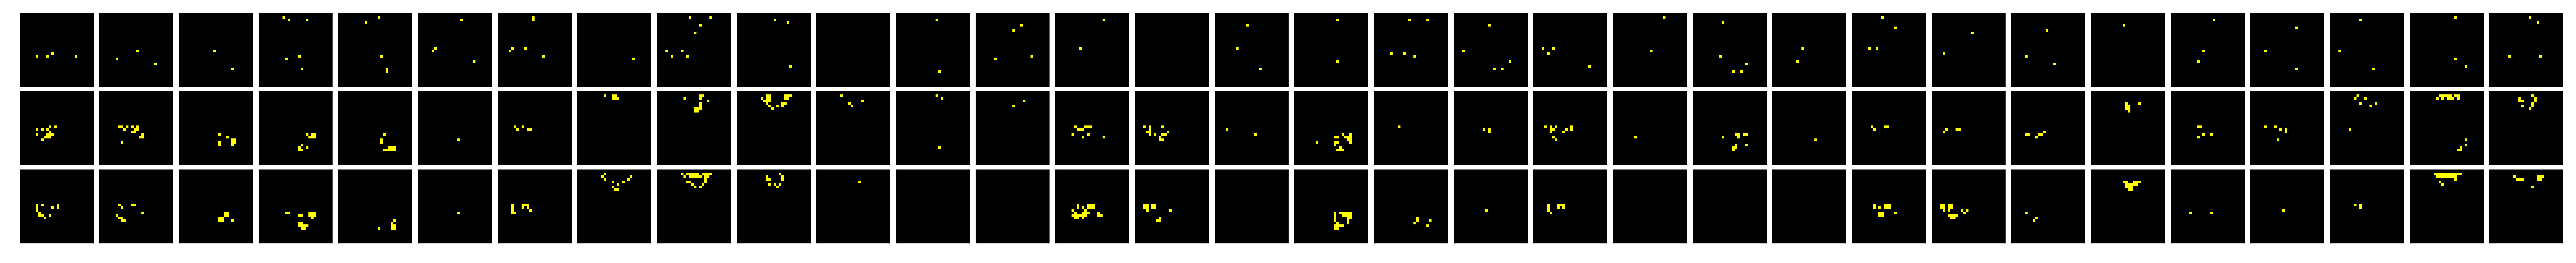

<Figure size 24000x3000 with 0 Axes>

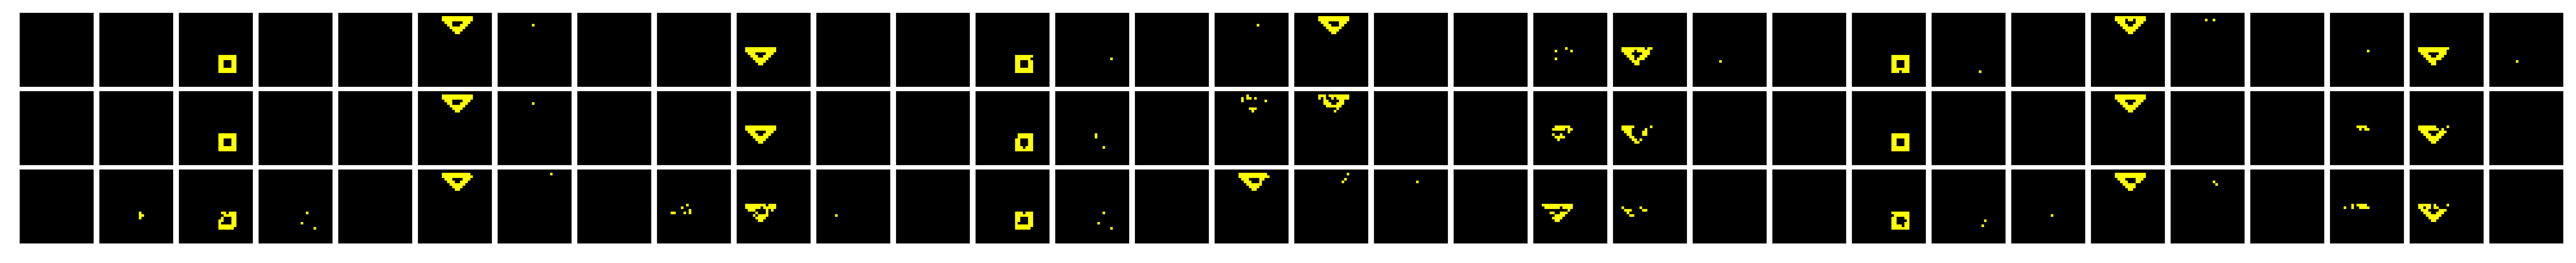

In [5]:
plt.rcParams['figure.figsize'] = (24.0, 3.0) # 单位是inches
def draw_spikes(spike_record, beg, end, name = ''):
    T = spike_record.shape[1]
    fig = plt.figure()
    plt.subplots_adjust(wspace=0.1, hspace=0.05)  # 将高度和宽度百分比缩小到零
    for i in range(beg, end):
        for j in range(T):
            plt.subplot(end - beg + 1, T, (i - beg) * T + j + 1)
            #plt.subplot(8, 8, j + 1)
            # sns.heatmap(spike_record[i,j,:,:], square=True, cmap='viridis_r',
            #             xticklabels=False, yticklabels=False, cbar=False)
            colors = ['black', 'yellow'] 
            cmap = mpl.colors.ListedColormap(colors)
            plt.imshow(spike_record[i, j, :, :], cmap=cmap)
            plt.axis('on')
            plt.box('on')
            frame = plt.gca()
            
            frame.axes.get_yaxis().set_visible(False)
            frame.axes.get_xaxis().set_visible(False)
#             plt.tight_layout()
            
    plt.show()
    plt.savefig('./fig4/')

for i in range(1):
    sz = spk[i].shape[0]
    draw_spikes(spk[i], beg=0, end=3)
    draw_spikes(spk[i], beg=sz-3, end=sz)

spk.shape1:   (128, 28, 28)
K:  3.0


/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/hom

(128,)


/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:113: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:113: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:113: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/cbicr-z/.conda/envs/BindNET/lib/python3.6/site-packages/ipykernel_launcher.py:113: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


<Figure size 24000x3000 with 0 Axes>

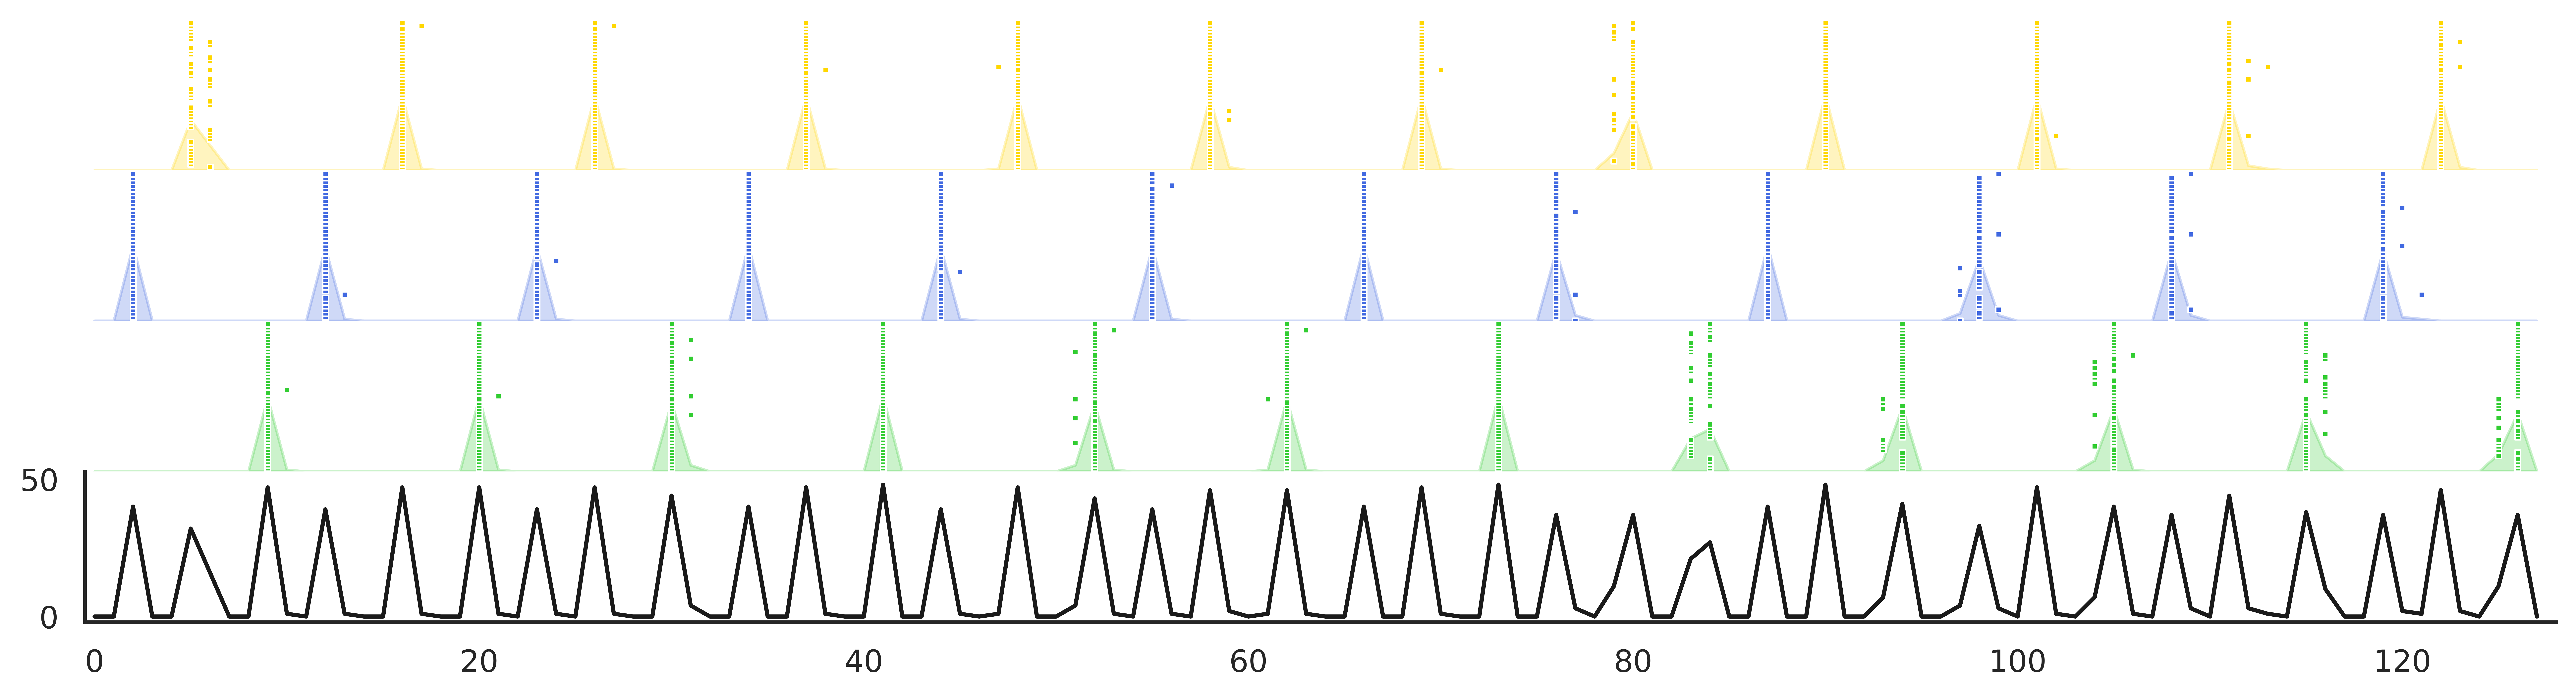

In [6]:
def draw_spike_rasters(spike_record, label, k, color):
    iter = spike_record.shape[0]
    T = spike_record.shape[1]
    spike_record_1d = copy.deepcopy(spike_record.reshape(iter,T,-1))
    size = spike_record_1d.shape[2]
    spike_record_1d = spike_record_1d.reshape(-1, size)

    tmp_idx = np.where(label.reshape(-1) == k)[0]
    spike_record_1d = spike_record_1d[:, tmp_idx]
        
    def get_scatter_data(spk):
        imx = []
        imt = []
        # print("len(spk)[note:win = 32]:", len(spk))
        for i in range(len(spk)):
            for j in range(len(spk[i])):
                if spk[i][j] > 0:
                    imx.append(j)
                    imt.append(i)
        return imx, imt
    
    imx, imt = get_scatter_data(spike_record_1d)
    plt.scatter(imt, imx, alpha=1, s=4, c=color, marker='s', edgecolor='w', linewidth=0.5)
#     plt.savefig('./' + name + 'spike_raster.png')
    
def labeled_synchrony_measure(spk, label, back=2, num=2): # low level only
    spk_for_raster = copy.deepcopy(spk)
    K = np.max(label)
    sizex = spk.shape[2]
    sizey = spk.shape[3]
    spk = spk[-back:,:,:,:]
    spk = spk.reshape(-1,sizex,sizey)
    T = spk.shape[0]
    name = ['gold', 'royalblue', 'limegreen', 'coral', 'forestgreen', 'powderblue', 'red','blue','green','yellow','purple','orange','pink','silver','snow','teal','navy','gray']
    print("spk.shape1:  ",spk.shape)
    # spk = spk.reshape(T,-1)
    # print("spk.shape2:  ",spk.shape)
    print("K: ",K)
    groups = np.zeros((int(K),spk.shape[0],spk.shape[1],spk.shape[2])) # K,T,W,H
    selected = np.zeros((int(K),spk.shape[0],num)) # K,T,num
    for t in range(spk.shape[0]):
        for idx in range(spk.shape[1]):
            for idy in range(spk.shape[2]):
                if spk[t,idx,idy]>0:
                    k = int(label[idx, idy])
                    #print(k,t,idx,idy)
                    groups[k-1,t,idx,idy]=1

    for k in range(int(K)):
        id_pol = np.where(groups.sum(1)[k,:,:]>0)
        idx_tmp = np.random.choice(np.arange(len(id_pol[0])),size = num, replace=False)
        selected[k,:,:] = groups[k,:,id_pol[0][idx_tmp],id_pol[1][idx_tmp]].T

    #print("group_size:  ",groups.shape)
    groups = groups.sum(axis=(2, 3))
    #print("group_size:  ",groups.shape)
    t_axis = np.arange(1, T+1)
    
#     plt.rcParams['figure.figsize'] = (4.0, 4.0) # 单位是inches
#     plt.figure()
#     for k in range(int(K)):
#         plt.subplot(K, 1, k+1)
#         draw_spike_rasters(spk_for_raster, label, k+1, color=name[k])
#         plt.axis('off')
#     plt.subplots_adjust(wspace=0,hspace=0)  # 将高度和宽度百分比缩小到零
    

    plt.rcParams['figure.figsize'] = (16.0, 10.0) # 单位是inches
    plt.figure()
    for k in range(int(K)):
        plt.subplot(K+1+num*K, 1, k+1)
#         plt.bar(t_axis - 1, groups[k,:], color = name[k], alpha=0.4)
#         plt.plot(t_axis - 1, groups[k, :] * 0.5, color=name[k], alpha=0.8)
        plt.fill_between(t_axis - 1, 0, groups[k, :] * 0.5, color=name[k], alpha=.25)
        draw_spike_rasters(spk_for_raster[-back:], label, k+1, color=name[k])
        plt.ylim([0, groups[k, :].max()])
        plt.xlim([-0.5, t_axis[-1]])
        ax = plt.gca() # 获取当前的axes
#         if k == 0:
#             ax.spines['bottom'].set_color('none')
#         elif k == K - 1:
#             ax.spines['top'].set_color('none')
#         else:
        ax.spines['bottom'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('none')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.subplots_adjust(wspace=0,hspace=0)  # 将高度和宽度百分比缩小到零
    plt.subplot(K+1+num*K, 1, K+1)
    #print(groups[0,:])
    tmp = np.zeros_like(groups[0, :])
    print(tmp.shape)
    for k in range(int(K)):
        tmp += groups[k, :]
    plt.plot(t_axis - 1, tmp, color='k')
    plt.xlim([-0.5, t_axis[-1]])
    plt.ylim([-2, groups[k, :].max() * 1.1])
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

#     ax.set_xticks([])
#     ax.set_yticks([])
    
    
    plt.rcParams['figure.figsize'] = (12.0, 12.0) # 单位是inches
    plt.figure()
    
    for k in range(int(K)):
        for i in range(num):
            plt.subplot(num * K, 1, k * num + i + 1)
            plt.bar(t_axis, selected[k, :,i], color=name[k])
            fig = plt.gca()
            fig.axes.get_yaxis().set_visible(False)
            fig.axes.get_xaxis().set_visible(True)
    #plt.legend()
    plt.subplots_adjust(wspace=0, hspace=0)  # 将高度和宽度百分比缩小到零
    plt.show()

sns.set_theme(style='white')
labeled_synchrony_measure(spk[0], label, num=2, back=4)

In [8]:
plt.rcParams['figure.figsize'] = (12.0, 12.0) # 单位是inches
cur_fmri = fmri[0]
sns.heatmap(cur_fmri, square=True, xticklabels=False,
                yticklabels=False, cmap='jet', cbar=True, cbar_kws={"shrink": 0.8})
# plt.imshow(cur_fmri)
# plt.colorbar(fraction=0.046, pad=0.17, cmap="jet")
plt.show()